In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('csv/martinus_sk.csv', sep=',', low_memory=False)
df_db = pd.read_csv('csv/martinus_db.csv', sep=',', low_memory=False)
print (len(df))
print (len(df_db))

474
3295


In [4]:
print (df.columns)
print (df_db.columns)

Index(['code', 'date', 'comments', 'likes', 'caption', 'image'], dtype='object')
Index(['title', 'price'], dtype='object')


In [5]:
df.reset_index(inplace=True)
df.head(11)

,index,code,date,comments,likes,caption,image
0,0,BL0g9FMgm9L,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...,https://scontent-fra3-1.cdninstagram.com/t51.2...
1,1,BLyLQkNg8hb,1476964919,5,236,"Naša Borka, ktorú môžete stretnúť v kníhkupect...",https://scontent-fra3-1.cdninstagram.com/t51.2...
2,2,BLsyIhQgRD8,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a...",https://scontent-fra3-1.cdninstagram.com/t51.2...
3,3,BLlWmEJgaHa,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...,https://scontent-fra3-1.cdninstagram.com/t51.2...
4,4,BLiJIdagN63,1476426933,0,303,Aj vy už máte nachystanú kôpku kníh na víkend?...,https://scontent-fra3-1.cdninstagram.com/t51.2...
5,5,BLfsgqlBu_6,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor...",https://scontent-fra3-1.cdninstagram.com/t51.2...
6,6,BLbaX-1As1X,1476201092,2,340,Nové číslo magazínu O knihách rozdávame k náku...,https://scontent-fra3-1.cdninstagram.com/t51.2...
7,7,BLYRCu4AD9a,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...,https://scontent-fra3-1.cdninstagram.com/t51.2...
8,8,BLSrJ3XgJCV,1475907900,5,419,Dobré ránko! Víkend si zaslúži pomalé raňajky ...,https://scontent-fra3-1.cdninstagram.com/t51.2...
9,9,BLItcpPA9jD,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...,https://scontent-fra3-1.cdninstagram.com/t51.2...


In [6]:
df = df.drop('code', 1)
df = df.drop('image', 1)
df.head(11)

,index,date,comments,likes,caption
0,0,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...
1,1,1476964919,5,236,"Naša Borka, ktorú môžete stretnúť v kníhkupect..."
2,2,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a..."
3,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
4,4,1476426933,0,303,Aj vy už máte nachystanú kôpku kníh na víkend?...
5,5,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor..."
6,6,1476201092,2,340,Nové číslo magazínu O knihách rozdávame k náku...
7,7,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...
8,8,1475907900,5,419,Dobré ránko! Víkend si zaslúži pomalé raňajky ...
9,9,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...


In [7]:
df = df.drop_duplicates()
df_db = df_db.drop_duplicates()

In [8]:
df_db.head(11)

,title,price
0,Domácí krabičková dieta 1 - 3 - BOX,"26,92 €"
1,Divá Bára / Dobrý člověk,"7,76 €"
2,Doplňkový odpor v tréninku rychlostních schopn...,"11,66 €"
3,Myslivecké příběhy z hor,"10,49 €"
4,Ráchel a Lars (Obrázkový deník dvojího odcházení),"17,58 €"
5,Winx club - Omalovánky A4,"2,35 €"
6,Ztraceno ve vlnách,"12,44 €"
7,"Support (Ako vybudovať úspešný biznis, aj keď ...","11,49 €"
8,Trhlina,"10,32 €"
9,Smrť na druhom brehu,"10,36 €"


In [9]:
title = df_db["title"]
title = title.str.strip().str.lower().str.replace(" ", "")

In [10]:
import string
exclude = set(string.punctuation)
def remove_punctuation(title):
    title = ''.join(ch for ch in title if ch not in exclude)
    return title
    
title = title.apply(remove_punctuation)

In [11]:
import unicodedata
def remove_accents(title):
    nfkd_form = unicodedata.normalize('NFKD', title)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii

title = title.apply(remove_accents)

In [12]:
title = title.str.decode("utf-8")
df_db["edited_title"] = title
df_db.head(11)

,title,price,edited_title
0,Domácí krabičková dieta 1 - 3 - BOX,"26,92 €",domacikrabickovadieta13box
1,Divá Bára / Dobrý člověk,"7,76 €",divabaradobryclovek
2,Doplňkový odpor v tréninku rychlostních schopn...,"11,66 €",doplnkovyodporvtreninkurychlostnichschopnosti
3,Myslivecké příběhy z hor,"10,49 €",mysliveckepribehyzhor
4,Ráchel a Lars (Obrázkový deník dvojího odcházení),"17,58 €",rachelalarsobrazkovydenikdvojihoodchazeni
5,Winx club - Omalovánky A4,"2,35 €",winxclubomalovankya4
6,Ztraceno ve vlnách,"12,44 €",ztracenovevlnach
7,"Support (Ako vybudovať úspešný biznis, aj keď ...","11,49 €",supportakovybudovatuspesnybiznisajkedrobitejed...
8,Trhlina,"10,32 €",trhlina
9,Smrť na druhom brehu,"10,36 €",smrtnadruhombrehu


In [13]:
results = pd.Series(df["caption"]).str.extractall('(?P<hashtag>[#]+)(\w*)')
results

hashtag                       1
    match                                
0   0           #        martinusaciradia
    1           #                martinus
    2           #              martinussk
    3           #                   knihy
    4           #                   kniha
    5           #                   citam
    6           #              pravecitam
    7           #                 cocitat
    8           #       viaccasunacitanie
    9           #                    sova
    10          #              tipnaknihu
1   0           #              martinussk
    1           #             martinusaci
    2           #          borkazcubiconu
    3           #       pippidlhapancucha
    4           #             slovart_vyd
    5           #   podobnostcistonahodna
2   0           #                   knihy
    1           #              martinussk
    2           #           severskakrimi
    3           #            vludskejkozi
    4           #            jørgenbrekke
    5           #   vydavatelstvopremedia
    6           #          martinushrncek
3   0           #              tipnaknihu
    1           #              martinussk
    2           #                   knihy
    3           #                  vikend
    4           #       viaccasunacitanie
    5           #       viaccasunapecenie
...           ...                     ...
469 6           #          martinushrncek
470 0           #              tipnaknihu
    1           #              martinussk
    2           #                   knihy
    3           #                  vikend
    4           #       viaccasunacitanie
    5           #       viaccasunapecenie
    6           #         thestoryofacake
    7           #     thestoryofacakeblog
    8           #          stvoryzkuchyne
    9           #          miriamkalisova
    10          #     niesomziadnababovka
    11          #  pribehnovehopriezviska
471 0           #                  vikend
    1           #       viaccasunacitanie
    2           #              martinussk
    3           #                  oddych
    4           #           pohodasknihou
    5           #           jesensknihami
472 0           #              tipnaknihu
    1           #              martinussk
    2           #            tanecsdrakmi
    3           #          georgerrmartin
    4           #                 novinka
    5           #      ziskajsijejpriazen
473 0           #              martinussk
    1           #                     sme
    2           #         magazinoknihach
    3           #             harrypotter
    4           #      harrypotterforever

[2422 rows x 2 columns]

In [14]:
results1 = results.xs(3, level="match")
results1.head(10)

,hashtag,1
0,#,knihy
1,#,pippidlhapancucha
2,#,vludskejkozi
3,#,vikend
4,#,oddych
5,#,georgerrmartin
6,#,harrypotter
7,#,cubicon
8,#,ranajkysknihou
9,#,dievcavovlaku


In [15]:
all_hastags = []

for i in range(0,10):
    results.xs(i, level="match")
    all_hastags.append(results[1].tolist())
    
print (len(all_hastags[0]))

2422


In [16]:
b = df_db["edited_title"].tolist()
results.reset_index(inplace=True)  

final = []
for bd in b:
    try:
        if bd in all_hastags[0]:
            final.append(bd)
    except:
        pass


df_new = results[results[1].isin(final) == True]
print (len(df_new))

35


In [17]:
merged_inner = pd.merge(left=df_new,right=df, left_on='level_0', right_on='index')
merged_inner.head(11)

,level_0,match,hashtag,1,index,date,comments,likes,caption
0,0,9,#,sova,0,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...
1,2,3,#,vludskejkozi,2,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a..."
2,3,10,#,niesomziadnababovka,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
3,3,11,#,pribehnovehopriezviska,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
4,5,5,#,ziskajsijejpriazen,5,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor..."
5,7,5,#,dankaajanka,7,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...
6,9,3,#,dievcavovlaku,9,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...
7,13,14,#,harrypotter17box,13,1475142446,4,336,Kto si ešte dnes do 15:00 predobjedná nového H...
8,16,5,#,najkrajsieslovenskerozpravky,16,1474533750,4,225,Aká je vaša obľúbená jesenná kniha? Čo takto f...
9,29,5,#,peklojeotvorene,29,1472036874,4,156,Druhý detektívny román od vynikajúceho autora ...


In [18]:
merged_inner = merged_inner.drop('match', axis = 1)
merged_inner = merged_inner.drop('hashtag', axis = 1)
merged_inner = merged_inner.drop('level_0', axis = 1)
merged_inner.head(11)

,1,index,date,comments,likes,caption
0,sova,0,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...
1,vludskejkozi,2,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a..."
2,niesomziadnababovka,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
3,pribehnovehopriezviska,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
4,ziskajsijejpriazen,5,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor..."
5,dankaajanka,7,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...
6,dievcavovlaku,9,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...
7,harrypotter17box,13,1475142446,4,336,Kto si ešte dnes do 15:00 predobjedná nového H...
8,najkrajsieslovenskerozpravky,16,1474533750,4,225,Aká je vaša obľúbená jesenná kniha? Čo takto f...
9,peklojeotvorene,29,1472036874,4,156,Druhý detektívny román od vynikajúceho autora ...


In [19]:
merged_left = pd.merge(left=merged_inner,right=df_db, how='inner', left_on=1, right_on='edited_title')
merged_left = merged_left.drop_duplicates([1, 'edited_title'])
merged_left.head(11)

,1,index,date,comments,likes,caption,title,price,edited_title
0,sova,0,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...,Sova,"12,72 €",sova
1,vludskejkozi,2,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a...",V ľudskej koži,"11,01 €",vludskejkozi
3,niesomziadnababovka,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...,Nie som žiadna bábovka,"13,52 €",niesomziadnababovka
5,pribehnovehopriezviska,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...,Príbeh nového priezviska,"13,80 €",pribehnovehopriezviska
7,ziskajsijejpriazen,5,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor...",Získaj si jej priazeň,"10,59 €",ziskajsijejpriazen
9,dankaajanka,7,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...,Danka a Janka,"5,52 €",dankaajanka
10,dievcavovlaku,9,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...,Dievča vo vlaku,"10,64 €",dievcavovlaku
12,harrypotter17box,13,1475142446,4,336,Kto si ešte dnes do 15:00 predobjedná nového H...,Harry Potter 1 - 7 (box),"53,31 €",harrypotter17box
14,najkrajsieslovenskerozpravky,16,1474533750,4,225,Aká je vaša obľúbená jesenná kniha? Čo takto f...,Najkrajšie slovenské rozprávky,"17,79 €",najkrajsieslovenskerozpravky
15,peklojeotvorene,29,1472036874,4,156,Druhý detektívny román od vynikajúceho autora ...,Peklo je otvorené,"12,42 €",peklojeotvorene


In [20]:
merged_left = merged_left.drop([1, 'caption', 'edited_title'], axis=1)
merged_left.head(11)

,index,date,comments,likes,title,price
0,0,1477043403,4,106,Sova,"12,72 €"
1,2,1476783974,0,665,V ľudskej koži,"11,01 €"
3,3,1476534655,3,216,Nie som žiadna bábovka,"13,52 €"
5,3,1476534655,3,216,Príbeh nového priezviska,"13,80 €"
7,5,1476344818,12,400,Získaj si jej priazeň,"10,59 €"
9,7,1476095536,8,326,Danka a Janka,"5,52 €"
10,9,1475573558,6,413,Dievča vo vlaku,"10,64 €"
12,13,1475142446,4,336,Harry Potter 1 - 7 (box),"53,31 €"
14,16,1474533750,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
15,29,1472036874,4,156,Peklo je otvorené,"12,42 €"


In [21]:
import datetime 
def convert_date(date):
    new_date = datetime.datetime.fromtimestamp(int(date)).strftime('%d-%m-%Y')
    return new_date
date = merged_left["date"]
date = date.apply(convert_date)
merged_left["date"] = date
merged_left.head(11)

,index,date,comments,likes,title,price
0,0,21-10-2016,4,106,Sova,"12,72 €"
1,2,18-10-2016,0,665,V ľudskej koži,"11,01 €"
3,3,15-10-2016,3,216,Nie som žiadna bábovka,"13,52 €"
5,3,15-10-2016,3,216,Príbeh nového priezviska,"13,80 €"
7,5,13-10-2016,12,400,Získaj si jej priazeň,"10,59 €"
9,7,10-10-2016,8,326,Danka a Janka,"5,52 €"
10,9,04-10-2016,6,413,Dievča vo vlaku,"10,64 €"
12,13,29-09-2016,4,336,Harry Potter 1 - 7 (box),"53,31 €"
14,16,22-09-2016,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
15,29,24-08-2016,4,156,Peklo je otvorené,"12,42 €"


In [22]:
merged_left = merged_left.sort_values(by='likes', ascending=0)
merged_left.head(11)

,index,date,comments,likes,title,price
1,2,18-10-2016,0,665,V ľudskej koži,"11,01 €"
18,161,29-01-2016,7,467,Prezident,"10,32 €"
10,9,04-10-2016,6,413,Dievča vo vlaku,"10,64 €"
7,5,13-10-2016,12,400,Získaj si jej priazeň,"10,59 €"
17,76,16-06-2016,3,353,Nežná fatamorgána,"11,53 €"
12,13,29-09-2016,4,336,Harry Potter 1 - 7 (box),"53,31 €"
9,7,10-10-2016,8,326,Danka a Janka,"5,52 €"
14,16,22-09-2016,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
3,3,15-10-2016,3,216,Nie som žiadna bábovka,"13,52 €"
5,3,15-10-2016,3,216,Príbeh nového priezviska,"13,80 €"


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

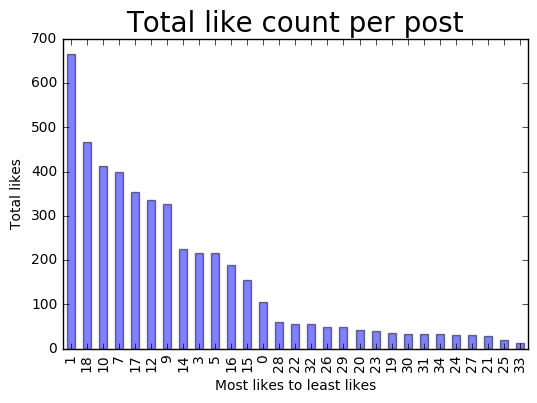

In [24]:
merged_left["likes"].plot(kind="bar", alpha=0.5)
plt.title("Total like count per post", fontsize=20)
plt.xlabel("Most likes to least likes")
plt.ylabel("Total likes")

In [25]:
def agregate(x):
    return Series(dict(Number_of_likes = x["likes"].count(),
                      Number_of_comments = x["comments"].count(),
                      ))

counts = df.groupby(merged_left["title"]).apply(agregate)
counts.head(11)

,Number_of_comments,Number_of_likes
title,,
Bezduché mesto,1,1
Biela levica (Severský triler),1,1
Danka a Janka,1,1
Diabol v zrkadle,1,1
Dievča vo vlaku,1,1
Divá Bára / Dobrý člověk,1,1
Ekonómia,1,1
Geniálna priateľka,1,1
Harry Potter 1 - 7 (box),1,1


In [26]:
counts.to_csv('Number of lines and comments.csv')

In [27]:
import pandas as pd
from IPython.display import Image, HTML

df_image = pd.DataFrame(['<img src="instagram.png"/>'], columns = ['Image'])

HTML(df_image.to_html(escape=False))

,Image
0,


In [28]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [29]:
merged_left[['likes','comments']].describe().T

,count,mean,std,min,25%,50%,75%,max
likes,29.00,161.24,171.28,12.00,34.00,56.00,225.00,665.00
comments,29.00,2.86,2.82,0.00,1.00,3.00,4.00,12.00


In [30]:
merged_left['likes'].corr(df['comments'])

0.019237615761311336

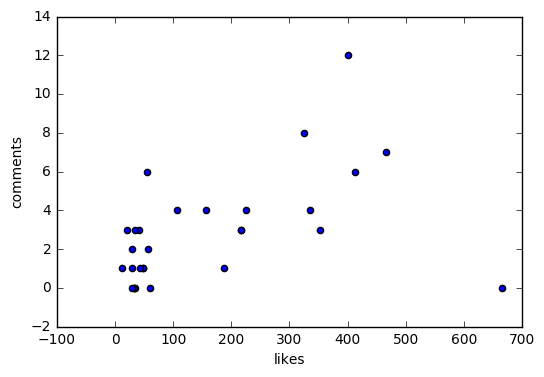

In [31]:
merged_left.plot(kind='scatter', x='likes', y='comments')

In [33]:
merged_left = merged_left[merged_left["comments"] >= 3]
merged_left

,index,date,comments,likes,title,price
18,161,29-01-2016,7,467,Prezident,"10,32 €"
10,9,04-10-2016,6,413,Dievča vo vlaku,"10,64 €"
7,5,13-10-2016,12,400,Získaj si jej priazeň,"10,59 €"
17,76,16-06-2016,3,353,Nežná fatamorgána,"11,53 €"
12,13,29-09-2016,4,336,Harry Potter 1 - 7 (box),"53,31 €"
9,7,10-10-2016,8,326,Danka a Janka,"5,52 €"
14,16,22-09-2016,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
3,3,15-10-2016,3,216,Nie som žiadna bábovka,"13,52 €"
5,3,15-10-2016,3,216,Príbeh nového priezviska,"13,80 €"
15,29,24-08-2016,4,156,Peklo je otvorené,"12,42 €"


In [34]:
merged_left = merged_left.sort_values(by=['comments'], ascending=0)
merged_left

,index,date,comments,likes,title,price
7,5,13-10-2016,12,400,Získaj si jej priazeň,"10,59 €"
9,7,10-10-2016,8,326,Danka a Janka,"5,52 €"
18,161,29-01-2016,7,467,Prezident,"10,32 €"
10,9,04-10-2016,6,413,Dievča vo vlaku,"10,64 €"
32,454,28-11-2012,6,55,Divá Bára / Dobrý člověk,"7,76 €"
12,13,29-09-2016,4,336,Harry Potter 1 - 7 (box),"53,31 €"
14,16,22-09-2016,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
15,29,24-08-2016,4,156,Peklo je otvorené,"12,42 €"
0,0,21-10-2016,4,106,Sova,"12,72 €"
17,76,16-06-2016,3,353,Nežná fatamorgána,"11,53 €"


In [35]:
df_users = pd.read_csv('csv/users.csv', sep=',', low_memory=False)
df_users.head(11)

,username,index_id
0,knihypaseka,16
1,gitagitka,13
2,crazyboy77777,161
3,knihypaseka,7
4,knihypaseka,454
5,katka3899,161
6,kristina.synakova1,13
7,essentials.daisydrop,29
8,annaprehodova,161
9,patrikm18,5


In [37]:
users = pd.merge(left=merged_left,right=df_users, how='inner', left_on='index', right_on='index_id')
users = users.drop(['likes', 'index_id'], axis=1)
users = users.drop_duplicates(['title', 'username'])
users.head(20)

,index,date,comments,title,price,username
0,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",patrikm18
1,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",janka_tomanova
2,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",kristina_kali
3,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",henta__tam
5,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",dasti96
6,7,10-10-2016,8,Danka a Janka,"5,52 €",knihypaseka
7,7,10-10-2016,8,Danka a Janka,"5,52 €",alenkakordiak
8,7,10-10-2016,8,Danka a Janka,"5,52 €",kristina_kali
9,7,10-10-2016,8,Danka a Janka,"5,52 €",ziarivy
11,7,10-10-2016,8,Danka a Janka,"5,52 €",kristina.synakova1


In [40]:
users["cluster"] = users["index"]
users.head(11)

,index,date,comments,title,price,username,cluster
0,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",patrikm18,5
1,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",janka_tomanova,5
2,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",kristina_kali,5
3,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",henta__tam,5
5,5,13-10-2016,12,Získaj si jej priazeň,"10,59 €",dasti96,5
6,7,10-10-2016,8,Danka a Janka,"5,52 €",knihypaseka,7
7,7,10-10-2016,8,Danka a Janka,"5,52 €",alenkakordiak,7
8,7,10-10-2016,8,Danka a Janka,"5,52 €",kristina_kali,7
9,7,10-10-2016,8,Danka a Janka,"5,52 €",ziarivy,7
11,7,10-10-2016,8,Danka a Janka,"5,52 €",kristina.synakova1,7


In [44]:
cluster_e = users[users["username"] == "ziarivy"]
cluster_e

,index,date,comments,title,price,username,cluster
9,7,10-10-2016,8,Danka a Janka,"5,52 €",ziarivy,7
23,9,04-10-2016,6,Dievča vo vlaku,"10,64 €",ziarivy,9
32,454,28-11-2012,6,Divá Bára / Dobrý člověk,"7,76 €",ziarivy,454
45,29,24-08-2016,4,Peklo je otvorené,"12,42 €",ziarivy,29
49,0,21-10-2016,4,Sova,"12,72 €",ziarivy,0


In [45]:
cluster_u = users[(users["cluster"] == 9) & (users["username"] != "ziarivy")]
cluster_u

,index,date,comments,title,price,username,cluster
21,9,04-10-2016,6,Dievča vo vlaku,"10,64 €",knihypaseka,9
22,9,04-10-2016,6,Dievča vo vlaku,"10,64 €",zemancik.radoslav,9


In [46]:
cluster_r = users[users.username.isin(cluster_u["username"])]
cluster_r

,index,date,comments,title,price,username,cluster
6,7,10-10-2016,8,Danka a Janka,"5,52 €",knihypaseka,7
19,161,29-01-2016,7,Prezident,"10,32 €",zemancik.radoslav,161
21,9,04-10-2016,6,Dievča vo vlaku,"10,64 €",knihypaseka,9
22,9,04-10-2016,6,Dievča vo vlaku,"10,64 €",zemancik.radoslav,9
24,454,28-11-2012,6,Divá Bára / Dobrý člověk,"7,76 €",knihypaseka,454
38,16,22-09-2016,4,Najkrajšie slovenské rozprávky,"17,79 €",knihypaseka,16
43,29,24-08-2016,4,Peklo je otvorené,"12,42 €",zemancik.radoslav,29


In [47]:
cluster_r = cluster_r[~cluster_r.cluster.isin(cluster_e["cluster"])]
cluster_r

,index,date,comments,title,price,username,cluster
19,161,29-01-2016,7,Prezident,"10,32 €",zemancik.radoslav,161
38,16,22-09-2016,4,Najkrajšie slovenské rozprávky,"17,79 €",knihypaseka,16


In [48]:
from scipy.stats.stats import pearsonr
import scipy

In [50]:
def get_book_comments(username):
    comments = users[users.username == username]
    return comments["comments"].get_values()

In [53]:
y = scipy.array(get_book_comments("zemancik.radoslav"))
x = scipy.array(get_book_comments("knihypaseka"))

print (len(x))
print (len(y))

4
3


In [54]:
pearsonr(y[:3], x[:3])

(0.75592894601845451, 0.45437105165701008)